<a href="https://colab.research.google.com/github/BentheBurema/TM10007_ML_Project_group14/blob/main/ANOVA_PCA_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment Group 14 Dataset 2


## Importing libraries

In [2]:
# Basic packages
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

# Inspecting dataset
from scipy.stats import kstest

# Splitting dataset
from sklearn import model_selection

# Pre-processing
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing, model_selection, decomposition, svm, feature_selection
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from scipy.stats import skew, kurtosis, norm, kstest
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.stats import linregress

In [3]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 4.4

## Data loading


In [ ]:
# Data loading functions.
!git clone https://github.com/BentheBurema/TM10007_ML_Project_group14.git # ik snap niet waarom we dit doen? timo
from worcliver.load_data import load_data
data = load_data()

fatal: destination path 'TM10007_ML_Project_group14' already exists and is not an empty directory.


## Inspecting data

In [12]:
# Finding the number of missing and incorrect values
print(f"Number of None types: {data.isnull().sum().sum()}")     # Count number of None types
print(f"Number of NaN values: {data.isna().sum().sum()}")       # Count number of NaN values
print(f'The number of samples: {len(data.index)}')              # print number of samples, features and feature names
print(f'The number of features: {len(data.columns)}')

# Check if the dataset is balanced
malignant = (data['label'] == 'malignant').sum()
print(f'The percentage of tumors that is malignant is {(malignant/len(data.index))*100}')

# Check if the data is normally distributed
Y = data['label']
X = data.drop('label', axis=1)

p_values = {}
for key,values in X.items():

  #perform Kolmogorov-Smirnov test on the values and store the p_values
  _, p_value = kstest(values, 'norm')
  # Store the p-value in the dictionary
  p_values[key] = p_value

# Print the p-values
#for key, p_value in p_values.items():
    #print(f"{key}: {p_value}")

# If p<0.05 is not normally distributed, if p>0.05 it is normally distributed
count_less_than_005 = sum(p_value < 0.05 for p_value in p_values.values())
count_greater_than_005 = sum(p_value > 0.05 for p_value in p_values.values())

print(f"Amount of featuers not normally distributed: {count_less_than_005}")
print(f"Amount of features normally distributed: {count_greater_than_005}")



Number of None types: 0
Number of NaN values: 0
The number of samples: 186
The number of features: 494
The percentage of tumors that is malignant is 50.53763440860215
Amount of featuers not normally distributed: 493
Amount of features normally distributed: 0


## Splitting dataset in training set and test set


In [13]:
Y = data['label']
X = data.drop('label', axis=1)

# Split the dataset in training and test part
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
# Check if this is executed correctly
print("Amount samples in X_train (X_train):", X_train.shape[0])
print("Amount samples in X_test  (X_test):", X_test.shape[0])
print("Amount samples in Y_train (Y_train):", Y_train.shape[0])
print("Amount samples in Y_test (Y_test):", Y_test.shape[0])

display(X_train.head())

Amount samples in X_train (X_train): 148
Amount samples in X_test  (X_test): 38
Amount samples in Y_train (Y_train): 148
Amount samples in Y_test (Y_test): 38


,PREDICT_original_sf_compactness_avg_2.5D,PREDICT_original_sf_compactness_std_2.5D,PREDICT_original_sf_rad_dist_avg_2.5D,PREDICT_original_sf_rad_dist_std_2.5D,PREDICT_original_sf_roughness_avg_2.5D,PREDICT_original_sf_roughness_std_2.5D,PREDICT_original_sf_convexity_avg_2.5D,PREDICT_original_sf_convexity_std_2.5D,PREDICT_original_sf_cvar_avg_2.5D,PREDICT_original_sf_cvar_std_2.5D,...,PREDICT_original_phasef_phasesym_median_WL3_N5,PREDICT_original_phasef_phasesym_std_WL3_N5,PREDICT_original_phasef_phasesym_skewness_WL3_N5,PREDICT_original_phasef_phasesym_kurtosis_WL3_N5,PREDICT_original_phasef_phasesym_peak_WL3_N5,PREDICT_original_phasef_phasesym_peak_position_WL3_N5,PREDICT_original_phasef_phasesym_range_WL3_N5,PREDICT_original_phasef_phasesym_energy_WL3_N5,PREDICT_original_phasef_phasesym_quartile_range_WL3_N5,PREDICT_original_phasef_phasesym_entropy_WL3_N5
ID,,,,,,,,,,,,,,,,,,,,,
Liver-149_0,0.824583,0.055989,30.099345,4.415992,3.661071,1.861613,0.963279,0.022393,0.021571,0.011780,...,0.000000,0.104107,2.756906,8.453818,0.0,0,0.409805,222.558113,0.042636,11.809102
Liver-132_0,0.801146,0.092439,62.217271,5.375470,6.822246,2.509137,0.924549,0.049767,0.007751,0.002992,...,0.000000,0.100082,3.289330,11.458823,0.0,0,0.412003,2198.965478,0.000000,14.737962
Liver-018_0,0.784347,0.051682,29.057589,5.423131,8.776120,6.493751,0.967914,0.015269,0.035515,0.011933,...,0.015554,0.152348,1.301602,0.810392,0.0,0,0.526233,678.343564,0.211135,12.903202
Liver-135_0,0.762971,0.071214,39.719594,6.220513,8.349609,4.035151,0.944998,0.031507,0.028765,0.017286,...,0.000000,0.108344,1.929157,3.090863,0.0,0,0.391573,1168.726859,0.088960,14.316269
Liver-015_0,0.836579,0.075738,61.507831,7.303462,11.104662,3.733124,0.952526,0.027722,0.016664,0.011443,...,0.000000,0.078725,3.747019,15.215261,0.0,0,0.332604,1306.631943,0.000000,14.384808


## Preprocessing

### Outliers

In [ ]:
# Checking on outliers using interquartile range
def define_outliers(feature):
  sorted_feature = np.sort(feature)
  Q1 = np.percentile(feature, 25)
  Q3 = np.percentile(feature, 75)
  IQR = Q3 - Q1
  print('Q1:',Q1)
  print('Q3:',Q3)
  print(IQR)
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  print(lower_bound)
  print(upper_bound)
  outliers = feature[(feature < lower_bound) | (feature > upper_bound)]
  outliers_total_column = (feature < lower_bound).sum() + (feature > upper_bound).sum()
  return outliers, outliers_total_column, lower_bound, upper_bound

# Performing the above functions on the train set
outliers_total = 0
for column in X_train.columns:
  outliers, outliers_total_column,_,_ = define_outliers(X_train[column])
  outliers_total += outliers_total_column
  #print(f'There are {outliers_total_column} outliers in {column}')
  #print(f'Outliers in column {column}: {outliers.tolist()}')
print(f'In total there are {outliers_total} outliers')


Q1: 0.7698883278556026
Q3: 0.854126917602908
0.08423858974730547
0.6435304432346444
0.9804848022238662
Q1: 0.0437512267872371
Q3: 0.08588374905220163
0.04213252226496453
-0.019447556610209693
0.14908253244964842
Q1: 19.846226619401516
Q3: 38.818462451547674
18.972235832146158
-8.612127128817722
67.27681619976691
Q1: 2.799025860605664
Q3: 6.123797838416241
3.324771977810577
-2.1881321061102015
11.110955805132107
Q1: 6.318800154179313
Q3: 10.277373770475776
3.958573616296463
0.3809397297346182
16.21523419492047
Q1: 1.9178264875022413
Q3: 4.062814067548619
2.1449875800463776
-1.299654882567325
7.280295437618185
Q1: 0.9476235558727522
Q3: 0.9741531956670603
0.026529639794308113
0.90782909618129
1.0139476553585225
Q1: 0.0168107764642327
Q3: 0.03638373367506102
0.019572957210828322
-0.012548659352009783
0.0657431694913035
Q1: 0.01648350289900305
Q3: 0.035435728916022924
0.018952226017019874
-0.011944836126526762
0.06386406794155274
Q1: 0.007762178468959675
Q3: 0.01869736414663365
0.010935185

### RobustScaling



In [ ]:
scaler = RobustScaler(quantile_range=(0.1, 0.9)).fit(X_train) # first and last 10% of samples are seen as outliers
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
display(X_train_scaled)

,PREDICT_original_sf_compactness_avg_2.5D,PREDICT_original_sf_compactness_std_2.5D,PREDICT_original_sf_rad_dist_avg_2.5D,PREDICT_original_sf_rad_dist_std_2.5D,PREDICT_original_sf_roughness_avg_2.5D,PREDICT_original_sf_roughness_std_2.5D,PREDICT_original_sf_convexity_avg_2.5D,PREDICT_original_sf_convexity_std_2.5D,PREDICT_original_sf_cvar_avg_2.5D,PREDICT_original_sf_cvar_std_2.5D,...,PREDICT_original_phasef_phasesym_median_WL3_N5,PREDICT_original_phasef_phasesym_std_WL3_N5,PREDICT_original_phasef_phasesym_skewness_WL3_N5,PREDICT_original_phasef_phasesym_kurtosis_WL3_N5,PREDICT_original_phasef_phasesym_peak_WL3_N5,PREDICT_original_phasef_phasesym_peak_position_WL3_N5,PREDICT_original_phasef_phasesym_range_WL3_N5,PREDICT_original_phasef_phasesym_energy_WL3_N5,PREDICT_original_phasef_phasesym_quartile_range_WL3_N5,PREDICT_original_phasef_phasesym_entropy_WL3_N5
0,0.593449,-0.512787,2.764207,18.824778,-30.273396,-6.262893,0.030864,-2.139842,-3.456042,-0.658069,...,0.000000,-4.059108,3.770219,33.530614,0.0,0.0,-1.448086,-56.600453,-0.012193,-0.934114
1,-0.505103,4.819001,49.685762,79.253830,-7.429916,-2.296391,-0.965440,54.349288,-26.428354,-24.889439,...,0.000000,-5.190570,9.013054,65.130885,0.0,0.0,-1.373211,753.453879,-0.054829,5.029282
2,-1.292538,-1.142711,1.242290,82.255610,6.689289,22.111916,0.150117,-16.840124,19.722419,-0.235484,...,0.015554,9.500316,-10.560298,-46.846717,0.0,0.0,2.517749,130.208697,0.156306,1.293562
3,-2.294474,1.714355,16.818572,132.475634,3.607207,7.051418,-0.439393,16.667383,8.502050,14.523536,...,0.000000,-2.868232,-4.380701,-22.865560,0.0,0.0,-2.069117,331.198189,0.034131,4.170682
4,1.155748,2.376003,48.649332,200.681026,23.515941,5.201310,-0.245742,8.857921,-11.612280,-1.586294,...,0.000000,-11.193331,13.519957,104.633136,0.0,0.0,-4.077755,387.720246,-0.054829,4.310234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,-2.429441,6.000959,-9.320445,-70.747301,22.175531,12.260150,-0.480027,16.259302,-0.998742,-2.573834,...,0.000000,10.919090,-8.269818,-41.658422,0.0,0.0,2.893651,6.156466,0.123238,-1.058700
144,0.083177,-3.677656,-2.529138,-12.922478,-25.206532,-8.069528,-0.063973,-9.299049,-1.650036,-9.234129,...,0.000000,-3.182801,0.863018,8.797954,0.0,0.0,-1.494748,-79.913172,-0.019185,-2.029277
145,3.848175,-1.184536,-17.282969,-163.746650,-10.459304,-13.579521,0.445634,-14.485538,-21.334415,-12.500779,...,0.000000,4.947250,-3.314365,-16.695182,0.0,0.0,1.676575,-69.180839,0.047388,-2.501283
146,-0.499371,4.998171,15.306557,88.777489,8.815968,5.671185,-0.217076,40.146946,5.872943,20.455827,...,0.000000,-11.527585,14.010989,108.728430,0.0,0.0,-4.352899,-70.029644,-0.054829,-1.362260


### Remove zero variance

In [ ]:
# Remove features with zero variance
vt = VarianceThreshold(threshold=0)
X_train_var = vt.fit_transform(X_train_scaled)
# Selecteer de juiste kolommen uit X_train_scaled
selected_columns = X_train_scaled.columns[vt.get_support()]

# Maak een DataFrame van de getransformeerde dataset met de geselecteerde kolomnamen
X_train_var = pd.DataFrame(X_train_var, columns=selected_columns)
print(f'The data shape before removing zero variance: {X_train_scaled.shape} and after: {X_train_var.shape}')

### ANOVA test

In [ ]:
# ANOVA feature selection for numeric input and categorical output
# define feature selection
fs = SelectKBest(score_func=f_classif, k='all')

## apply feature selection
X_train_anova = fs.fit_transform(X_train_var, Y_train)
X_train_anova = pd.DataFrame(data=X_train_anova, columns=X_train_var.columns)
feature_scores = list(zip(fs.pvalues_, X_train_anova.columns))

# Features selecteren met p-waarde kleiner dan 0.05, want dan is benigne significant verschillend van maligne
selected_features = [feature[1] for feature in feature_scores if feature[0] < 0.05]

# Filter de DataFrame om alleen geselecteerde features te behouden
X_train_anova = X_train_anova[selected_features]
print(f'The data shape before ANOVA: {X_train_var.shape} and after ANOVA: {X_train_anova.shape}')

The data shape before ANOVA: (148, 476) and after ANOVA: (148, 61)


### PCA


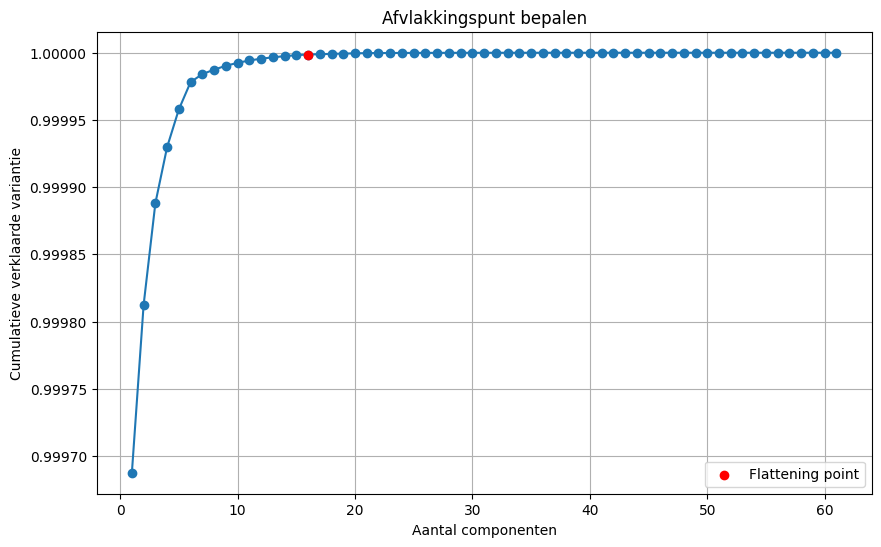

Beste aantal componenten (Afvlakkingspunt-methode): 16
The data shape before PCA: (148, 61) and after: (148, 16)


In [18]:
def find_optimal_components_flattening(X_train, window_size, slope_threshold):
    pca = PCA()
    pca.fit(X_train)
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

    # Pas stuksgewijze lineaire regressie toe op de cumulatieve verklaarde variantiecurve
    slopes = []
    for i in range(window_size // 2, len(cumulative_variance_ratio) - window_size // 2):
        x = np.arange(i - window_size // 2, i + window_size // 2 + 1)
        y = cumulative_variance_ratio[i - window_size // 2:i + window_size // 2 + 1]
        slope, _, _, _, _ = linregress(x, y)
        slopes.append(slope)

    # Vind het punt waar de helling van de regressielijn significant verandert
    for i, slope in enumerate(slopes):
        if slope < slope_threshold:
            change_point_index = i + window_size // 2
            break

    flattening_point_x = change_point_index + 1
    flattening_point_y = cumulative_variance_ratio[change_point_index]

    # Plot de cumulatieve verklaarde variantie en de regressielijn
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
    plt.title('Afvlakkingspunt bepalen')
    plt.xlabel('Aantal componenten')
    plt.ylabel('Cumulatieve verklaarde variantie')
    plt.grid(True)
    plt.scatter(flattening_point_x, flattening_point_y, color='red', label='Flattening point', zorder=5)  # Verhoog de z-index
    plt.legend()
    plt.show()

    return flattening_point_x

# Gebruik de functie met je trainingsgegevens
best_n_components = find_optimal_components_flattening(X_train_anova, window_size=30, slope_threshold=0.01)  # Vergroot het venster naar 10 punten
print("Beste aantal componenten (Afvlakkingspunt-methode):", best_n_components)


# Initialiseer PCA met het beste aantal componenten
pca = PCA(n_components=best_n_components)

# Pas PCA toe op je trainingsgegevens
X_train_pca = pca.fit_transform(X_train_anova)


print(f'The data shape before PCA: {X_train_anova.shape} and after: {X_train_pca.shape}')


# # Bereken de covariantiematrix
# cov_matrix = np.cov(X_train_anova.T)

# # Bereken eigenvectoren en eigenwaarden
# eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# # Sorteer eigenwaarden in aflopende volgorde
# sorted_indices = np.argsort(eigenvalues)[::-1]
# sorted_eigenvalues = eigenvalues[sorted_indices]

# # Bereken de cumulatieve variantie
# total_variance = np.sum(sorted_eigenvalues)
# explained_variance_ratio = sorted_eigenvalues / total_variance
# cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# # Bepaal het aantal features dat nodig is om een bepaald percentage van de totale variantie te behouden
# desired_variance_ratio = 0.8  # bijvoorbeeld 80%
# num_features = np.argmax(cumulative_variance_ratio >= desired_variance_ratio) + 1

# print("Aantal features om {:.0%} van de totale variantie te behouden: {}".format(desired_variance_ratio, num_features))

KNN-classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
import numpy as np
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.metrics import precision_recall_fscore_support

# Creating label encoder
label_encoder = LabelEncoder()


# Apply label encoder on Y_train to transform categorical input to numeric input. Malignant = 1, benigne = 0
Y_train_encoded = label_encoder.fit_transform(Y_train)


# Define the coded classes
print("Coded classes:", label_encoder.classes_)


f2_scorer = make_scorer(fbeta_score, beta=2)
# Maak een parameter grid voor RandomizedSearchCV
param_dist = {'n_neighbors': list(range(5, 20)),
              'weights': ['uniform','distance'],
              'p': list(range(1, 10)),
              'algorithm': ['ball_tree','kd_tree','brute','auto']}

# Maak een RandomizedSearchCV-object en pas het toe op je trainingsdata met kruisvalidatie
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist, n_iter=10, cv=5, random_state=0, scoring=f2_scorer)  # 5-voudige kruisvalidatie
random_search.fit(X_train_pca, Y_train_encoded)

# Bekijk de beste parameters en beste score
print("Beste parameters gevonden: ", random_search.best_params_)
print("Beste cross-validation score: {:.2f}".format(random_search.best_score_))

# Niet doen dit dan krijgt Benthe de kriebels!!!
# # Bekijk prestaties van het beste model met kruisvalidatie op de hele dataset
# best_knn = random_search.best_estimator_
# cv_scores = cross_val_score(best_knn, X_test, Y_test, cv=5)  # 5-voudige kruisvalidatie
# print("Gemiddelde cross-validation score op de hele dataset: {:.2f}".format(np.mean(cv_scores)))


Coded classes: ['benign' 'malignant']
Beste parameters gevonden:  {'weights': 'distance', 'p': 3, 'n_neighbors': 8, 'algorithm': 'brute'}
Beste cross-validation score: 0.63


In [ ]:

def KNN(X_pca, y_train, clsfs):
    print("Working on the KNN classification.")
    # Specify the search range, this could be multiple parameters for more complex classifiers
    parameters = {'n_neighbors': randint(1, 10),
                'weights': ['uniform'],
                'p': randint(1, 5),
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

    # Specify the cross validation method to use, we use 10-fold stratified cross-validation
    cv_10fold = model_selection.StratifiedKFold(n_splits=10)

    # Create the grid search method, use area under ROC curve as scoring metric
    # Too learn more about metrics see: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    clf = model_selection.RandomizedSearchCV(neighbors.KNeighborsClassifier(), parameters, cv=cv_10fold, n_iter=500, scoring=scoring, refit='harmonic_mean', random_state=42)

    # Do the entire search
    clf.fit(X_pca, Y_train)

    # Show the complete results of the cross validation
    clf_df = pd.DataFrame(clf.cv_results_)
    # print(clf_df)

    # Extract the best k
    clf_df = clf_df.sort_values(by=['rank_test_harmonic_mean'])
    print("Best parameters for KNN are: ", clf.best_params_)
    print("Harmonic mean of KNN classifier is:", clf.best_score_)
    print(f"The mean accuracy score of KNN classifier is {clf_df['mean_test_accuracy'].iloc[0]}.")
    print(f"The mean recall score of KNN classifier is {clf_df['mean_test_recall'].iloc[0]}.")

    # Extract the best hyperparameters and fit
    knn_classifier = clf.best_estimator_
    knn_classifier.fit(X_pca, y_train)
    clsfs.append(knn_classifier)
    print("")
    return clsfs